In [1]:
#Importing all important modules 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import os 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,adjusted_rand_score,mean_absolute_error

 

In [2]:
#for displaying all the columns
pd.set_option("display.max_columns",None)

In [3]:
#Loading dataset 

telechurn=pd.read_csv(r"C:\Users\mr220\Documents\upgrad\capstone project\telecom_churn_data.csv")
telechurn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
#dataframe information
telechurn.shape

(99999, 226)

In [5]:
telechurn.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    mobile_number             99999 non-null  int64  
 1    circle_id                 99999 non-null  int64  
 2    loc_og_t2o_mou            98981 non-null  float64
 3    std_og_t2o_mou            98981 non-null  float64
 4    loc_ic_t2o_mou            98981 non-null  float64
 5    last_date_of_month_6      99999 non-null  object 
 6    last_date_of_month_7      99398 non-null  object 
 7    last_date_of_month_8      98899 non-null  object 
 8    last_date_of_month_9      98340 non-null  object 
 9    arpu_6                    99999 non-null  float64
 10   arpu_7                    99999 non-null  float64
 11   arpu_8                    99999 non-null  float64
 12   arpu_9                    99999 non-null  float64
 13   onnet_mou_6               96062 non-null  fl

In [6]:
telechurn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [7]:
# performing checks on data column's name
telechurn.columns = telechurn.columns.to_series().apply(lambda x: x.strip())
telechurn.columns = telechurn.columns.str.replace(' ', '')

In [8]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in telechurn.columns if column not in id_cols + date_cols + cat_cols]

In [9]:
 # Dropping the circle_id columns as it is of no use in model building
telechurn = telechurn.drop('circle_id' , axis=1)
telechurn.shape

(99999, 225)

In [10]:
# Dropping the date columns as they are of no use in model building
telechurn = telechurn.drop(date_cols, axis=1)
telechurn.shape

(99999, 213)

# checking null values 

In [11]:
NULLS=((telechurn.isnull().sum()/len(telechurn))*100).sort_values(ascending=False)
NULLS

count_rech_3g_6     74.846748
fb_user_6           74.846748
arpu_2g_6           74.846748
arpu_3g_6           74.846748
night_pck_user_6    74.846748
                      ...    
max_rech_amt_8       0.000000
max_rech_amt_7       0.000000
max_rech_amt_6       0.000000
total_rech_amt_9     0.000000
sep_vbc_3g           0.000000
Length: 213, dtype: float64

In [12]:
#columns which have more than 50% of null values 
null_50=NULLS[NULLS>50]
null_50

count_rech_3g_6       74.846748
fb_user_6             74.846748
arpu_2g_6             74.846748
arpu_3g_6             74.846748
night_pck_user_6      74.846748
total_rech_data_6     74.846748
max_rech_data_6       74.846748
av_rech_amt_data_6    74.846748
count_rech_2g_6       74.846748
arpu_3g_7             74.428744
fb_user_7             74.428744
night_pck_user_7      74.428744
max_rech_data_7       74.428744
count_rech_2g_7       74.428744
total_rech_data_7     74.428744
count_rech_3g_7       74.428744
arpu_2g_7             74.428744
av_rech_amt_data_7    74.428744
total_rech_data_9     74.077741
arpu_3g_9             74.077741
fb_user_9             74.077741
count_rech_2g_9       74.077741
night_pck_user_9      74.077741
av_rech_amt_data_9    74.077741
arpu_2g_9             74.077741
max_rech_data_9       74.077741
count_rech_3g_9       74.077741
total_rech_data_8     73.660737
av_rech_amt_data_8    73.660737
max_rech_data_8       73.660737
arpu_2g_8             73.660737
night_pc

In [13]:
#  Now we can drop all the columns having more than 50% nulls
telechurn=telechurn.drop(null_50.index,axis=1)

In [14]:
#checking shape after dropping
telechurn.shape

(99999, 177)

In [15]:
# Checking remaining columns with null value

null_col=NULLS[(NULLS.values < 50) & (NULLS.values > 0)].sort_values(ascending=False)
null_col

std_og_mou_9        7.745077
std_og_t2f_mou_9    7.745077
isd_og_mou_9        7.745077
onnet_mou_9         7.745077
offnet_mou_9        7.745077
                      ...   
std_og_t2m_mou_7    3.859039
loc_ic_t2f_mou_7    3.859039
std_og_t2o_mou      1.018010
loc_ic_t2o_mou      1.018010
loc_og_t2o_mou      1.018010
Length: 119, dtype: float64

In [16]:
# listing out all the remaining null columns that need to be imputed

null_cols_impute = list(null_col[(null_col.values < 50) & (null_col.values > 0)].sort_values(ascending=False).index)
telechurn[null_cols_impute].info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 119 columns):
 #    Column            Non-Null Count  Dtype  
---   ------            --------------  -----  
 0    std_og_mou_9      92254 non-null  float64
 1    loc_og_t2m_mou_9  92254 non-null  float64
 2    std_og_t2f_mou_9  92254 non-null  float64
 3    std_ic_t2m_mou_9  92254 non-null  float64
 4    std_ic_mou_9      92254 non-null  float64
 5    std_ic_t2o_mou_9  92254 non-null  float64
 6    std_ic_t2f_mou_9  92254 non-null  float64
 7    std_ic_t2t_mou_9  92254 non-null  float64
 8    spl_og_mou_9      92254 non-null  float64
 9    loc_ic_t2f_mou_9  92254 non-null  float64
 10   loc_ic_t2t_mou_9  92254 non-null  float64
 11   og_others_9       92254 non-null  float64
 12   isd_ic_mou_9      92254 non-null  float64
 13   loc_ic_mou_9      92254 non-null  float64
 14   ic_others_9       92254 non-null  float64
 15   spl_ic_mou_9      92254 non-null  float64
 16   std_og_t2c_mou_9  92

In [17]:
# imputing the missing values with Median values for numerical columns

for col in null_cols_impute:
    
    telechurn[col] = telechurn[col].fillna(telechurn[col].median())

# adding new column for average revenue for 6th & 7th month

In [18]:
telechurn['avg_revenue_6_7'] = round(((telechurn['total_rech_amt_6'] + telechurn['total_rech_amt_7'])/2), 2)
telechurn

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,34.31,32.33,0.00,29.84,96.31,91.735,0.00,87.29,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,11.91,11.61,0.00,11.26,41.03,40.43,0.00,39.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,65.11,63.685,0.00,61.84,0.00,0.00,0.00,0.00,3.95,3.635,0.00,2.50,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,11.64,11.09,0.00,8.41,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,15.69,15.74,0.16,15.66,56.49,57.08,4.13,56.61,0.88,0.93,1.15,0.96,92.16,92.55,5.44,91.64,0.00,0.00,0.00,0.00,2.03,2.04,0.00,1.74,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.89,5.96,0.00,5.38,0.00,0.00,5.44,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,307.0
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.840,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.510,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.460,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.00,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.0

In [19]:
# filtering out high value customers by 70th percentile of recharge amount

tele_high_val_cust = telechurn[telechurn['avg_revenue_6_7'] > np.percentile(telechurn['avg_revenue_6_7'],70)].reset_index(drop=True)
tele_high_val_cust

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
0,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,29.84,453.43,567.16,325.91,87.29,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,11.26,308.63,447.38,162.28,39.12,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,61.84,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.50,6.66,20.08,16.68,0.00,0.0,0.0,0.0,0.0,60.86,75.14,77.84,8.41,0.0,0.18,10.01,0.0,4.50,0.00,6.50,0.00,0.00,0.0,0.0,0.0,487.53,609.24,350.16,0.00,58.14,32.26,27.31,15.66,217.56,221.49,121.19,56.61,152.16,101.46,39.53,0.96,427.88,355.23,188.04,91.64,36.89,11.83,30.39,0.00,91.44,126.99,141.33,1.74,52.19,34.24,22.21,0.00,0.0,0.0,0.0,0.0,180.54,173.08,193.94,5.38,626.46,558.04,428.74,0.00,0.21,0.0,0.0,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
1,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.0,0.00,0.00,0.0,0.00,0.00,10.23,0.00,0.00,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.

In [20]:
# Checking the number of rows and columns in the new dataframe

tele_high_val_cust.shape

(29979, 178)

In [21]:
# Checking info for high_value_customers dataset

tele_high_val_cust.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29979 entries, 0 to 29978
Data columns (total 178 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    mobile_number       29979 non-null  int64  
 1    loc_og_t2o_mou      29979 non-null  float64
 2    std_og_t2o_mou      29979 non-null  float64
 3    loc_ic_t2o_mou      29979 non-null  float64
 4    arpu_6              29979 non-null  float64
 5    arpu_7              29979 non-null  float64
 6    arpu_8              29979 non-null  float64
 7    arpu_9              29979 non-null  float64
 8    onnet_mou_6         29979 non-null  float64
 9    onnet_mou_7         29979 non-null  float64
 10   onnet_mou_8         29979 non-null  float64
 11   onnet_mou_9         29979 non-null  float64
 12   offnet_mou_6        29979 non-null  float64
 13   offnet_mou_7        29979 non-null  float64
 14   offnet_mou_8        29979 non-null  float64
 15   offnet_mou_9        29979 non-null

In [22]:
#observations
"""
-number of rows before filtering the high value customer was 99999
-after filtering high value customers 29979
"""

'\n-number of rows before filtering the high value customer was 99999\n-after filtering high value customers 29979\n'

In [23]:
##  total incoming and outgoing minutes of usage
tele_high_val_cust['total_calls_mou_9'] = tele_high_val_cust.total_ic_mou_9 + tele_high_val_cust.total_og_mou_9

In [24]:
#  total consumption 2g and 3g data
tele_high_val_cust['total_internet_mb_9'] =  tele_high_val_cust.vol_2g_mb_9 + tele_high_val_cust.vol_3g_mb_9

# We need to tag churned customers based on following criteria
Those who have not made any calls (either incoming or outgoing)
Those who have not used mobile internet even once in the churn phase

In [25]:
# Those who have not used either calls or internet in September are churned customers

# Let's denote 0 as not churn and  1 as churn

tele_high_val_cust['churn'] = tele_high_val_cust.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [26]:
# verifying churned customers are tagged correctly
tele_high_val_cust[['mobile_number','total_calls_mou_9','total_internet_mb_9','churn']].head()

,mobile_number,total_calls_mou_9,total_internet_mb_9,churn
0,7000701601,0.00,0.0,1
1,7001524846,177.09,0.0,0
2,7002191713,1077.95,0.0,0
3,7000875565,590.30,0.0,0
4,7000187447,718.21,0.0,0


In [27]:
# assigning correct dtype to churn variable
tele_high_val_cust["churn"] = tele_high_val_cust["churn"].astype("category")
tele_high_val_cust["churn"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

# Now the target variable has been defined as churned customers

In [28]:
# finding all the columns which has _9 in their name
cols_month_9 = tele_high_val_cust.filter(regex='_9$', axis=1).columns
print("The columns names ends with _9 are given below...")
cols_month_9

The columns names ends with _9 are given below...


Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9',
       'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9',
       'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9',
       'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'total_calls_mou_9',
       'total_internet_mb_9'],
      dtype='object')

In [29]:
# removing all the columns that are related to churn month (9th month)
tele_high_val_cust = tele_high_val_cust.drop(cols_month_9, axis=1)

In [30]:
# check dataset once again
tele_high_val_cust.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7,churn
0,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
1,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
2,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.0,0.0,0.0,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,2

In [31]:
# setting mobile number as index
tele_high_val_cust = tele_high_val_cust.set_index('mobile_number')
tele_high_val_cust.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.

In [32]:
#checking shape of tele_high_val_cust after dropping all unnecessary features
tele_high_val_cust.shape

(29979, 136)

# Plotting monthly 2g and 3g consumption for month ( june , july , august ) against Churn

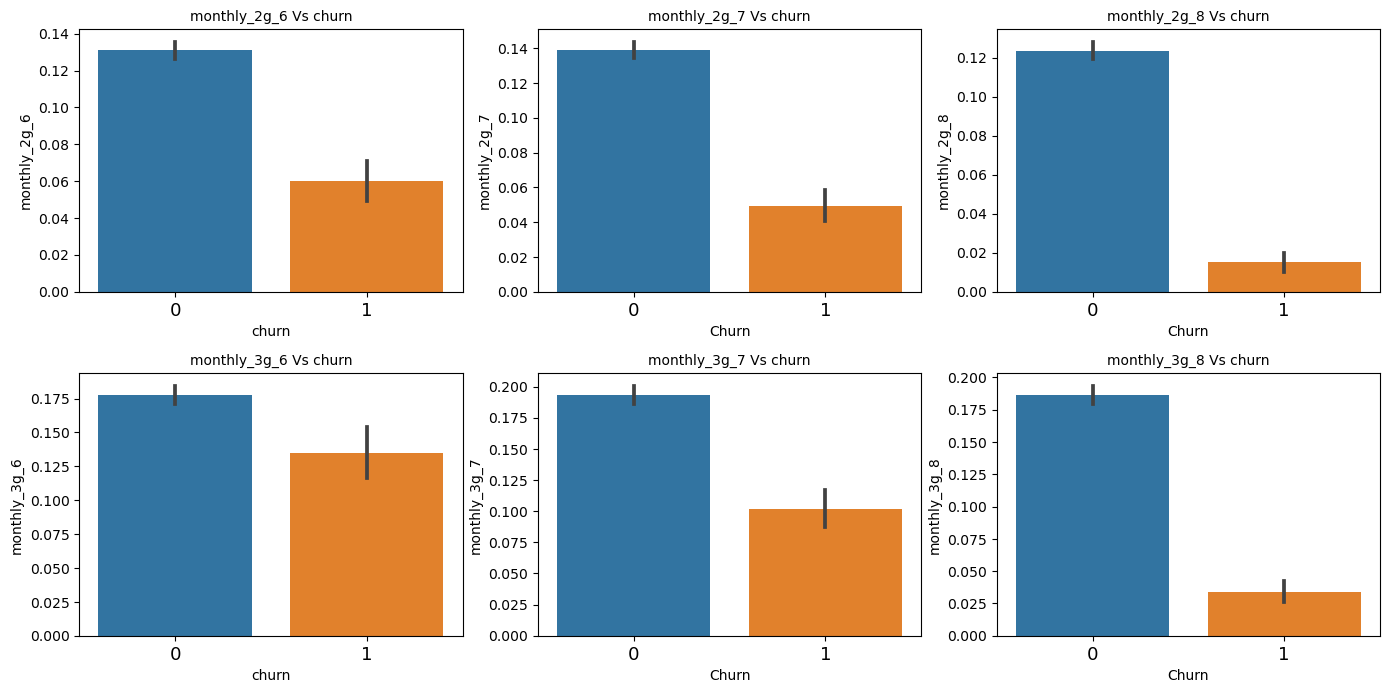

In [33]:
plt.figure(figsize=(14,10))


# monthly_2g_6
plt.subplot(3, 3, 1)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['monthly_2g_6']  , data=tele_high_val_cust)
plt.title('monthly_2g_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("monthly_2g_6", fontsize = 10)
plt.xticks(fontsize = 13)



# monthly_2g_7
plt.subplot(3, 3, 2)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['monthly_2g_7']  , data=tele_high_val_cust)
plt.title('monthly_2g_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_2g_7", fontsize = 10)
plt.xticks(fontsize = 13)


# monthly_2g_8
plt.subplot(3, 3, 3)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['monthly_2g_8']  , data=tele_high_val_cust)
plt.title('monthly_2g_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_2g_8", fontsize = 10)
plt.xticks(fontsize = 13)

# monthly_3g_6
plt.subplot(3, 3, 4)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['monthly_3g_6']  , data=tele_high_val_cust)
plt.title('monthly_3g_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("monthly_3g_6", fontsize = 10)
plt.xticks(fontsize = 13)

# monthly_3g_7
plt.subplot(3, 3, 5)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['monthly_3g_7']  , data=tele_high_val_cust)
plt.title('monthly_3g_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_3g_7", fontsize = 10)
plt.xticks(fontsize = 13)


# monthly_3g_8
plt.subplot(3, 3, 6)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['monthly_3g_8']  , data=tele_high_val_cust)
plt.title('monthly_3g_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("monthly_3g_8", fontsize = 10)
plt.xticks(fontsize = 13)
plt.tight_layout()
plt.show()



In [34]:
"""he bar plots show that customers who did not churn (churn = 0) tend to have higher usage of both 2G and 3G services compared to those who did churn (churn = 1)."""

'he bar plots show that customers who did not churn (churn = 0) tend to have higher usage of both 2G and 3G services compared to those who did churn (churn = 1).'

# Plotting average revenue per user for month ( june , july , august ) against Churn

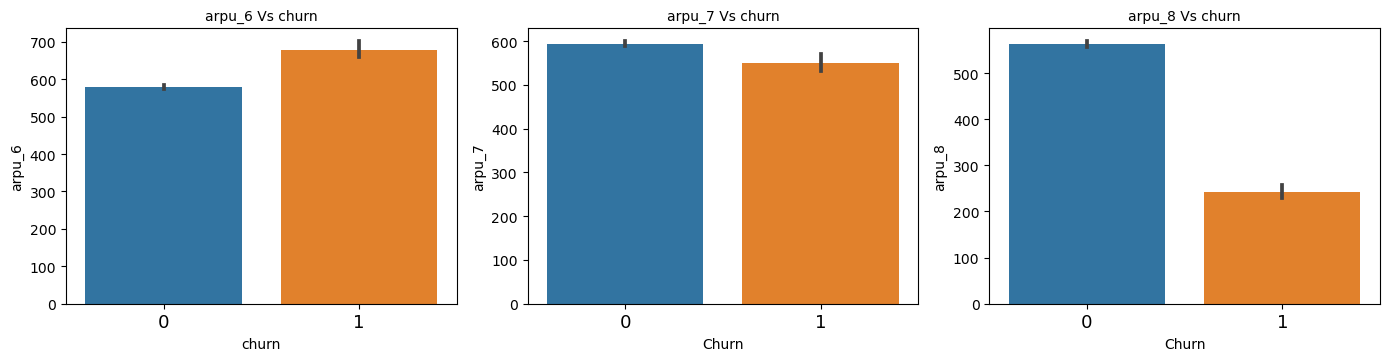

In [35]:
plt.figure(figsize=(14,10))


# arpu_6
plt.subplot(3, 3, 1)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['arpu_6']  , data=tele_high_val_cust)
plt.title('arpu_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("arpu_6", fontsize = 10)
plt.xticks(fontsize = 13)



# arpu_7
plt.subplot(3, 3, 2)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['arpu_7']  , data=tele_high_val_cust)
plt.title('arpu_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("arpu_7", fontsize = 10)
plt.xticks(fontsize = 13)



# arpu_8
plt.subplot(3, 3, 3)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['arpu_8']  , data=tele_high_val_cust)
plt.title('arpu_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("arpu_8", fontsize = 10)
plt.xticks(fontsize = 13)

plt.tight_layout()
plt.show()

In [36]:
#observations
"""
arpu_6 Vs churn:

The ARPU (Average Revenue Per User) for customers who churned (labeled as 1) is higher than for those who did not churn (labeled as 0).

arpu_7 Vs churn:

The ARPU for customers who did not churn (0) is slightly higher than for those who churned (1).

arpu_8 Vs churn:

The ARPU for customers who did not churn (0) is significantly higher than for those who churned (1).
"""

'\narpu_6 Vs churn:\n\nThe ARPU (Average Revenue Per User) for customers who churned (labeled as 1) is higher than for those who did not churn (labeled as 0).\n\narpu_7 Vs churn:\n\nThe ARPU for customers who did not churn (0) is slightly higher than for those who churned (1).\n\narpu_8 Vs churn:\n\nThe ARPU for customers who did not churn (0) is significantly higher than for those who churned (1).\n'

# Plotting total outgoing call minute of usage for month ( june , july , august ) against Churn

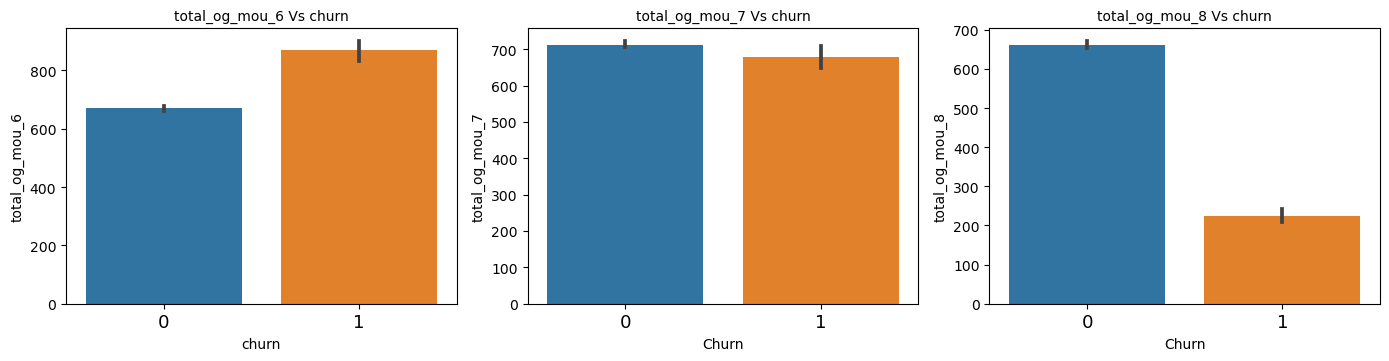

In [37]:
plt.figure(figsize=(14,10))


# total_og_mou_6
plt.subplot(3, 3, 1)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_og_mou_6']  , data=tele_high_val_cust)
plt.title('total_og_mou_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("total_og_mou_6", fontsize = 10)
plt.xticks(fontsize = 13)



# total_og_mou_7
plt.subplot(3, 3, 2)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_og_mou_7']  , data=tele_high_val_cust)
plt.title('total_og_mou_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_og_mou_7", fontsize = 10)
plt.xticks(fontsize = 13)


# total_og_mou_8
plt.subplot(3, 3, 3)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_og_mou_8']  , data=tele_high_val_cust)
plt.title('total_og_mou_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_og_mou_8", fontsize = 10)
plt.xticks(fontsize = 13)

plt.tight_layout()
plt.show()

In [38]:
#observations
"""
Churners (1): Have a higher average total outgoing minutes of usage in the 6th month.
Churners (1): Show a slightly lower average total outgoing minutes of usage in 7th month.
Churners (1): Have a significantly lower average total outgoing minutes of usage in 8th month."""

'\nChurners (1): Have a higher average total outgoing minutes of usage in the 6th month.\nChurners (1): Show a slightly lower average total outgoing minutes of usage in 7th month.\nChurners (1): Have a significantly lower average total outgoing minutes of usage in 8th month.'

# Plotting total incoming call minute of usage for month ( june , july , august ) against Churn

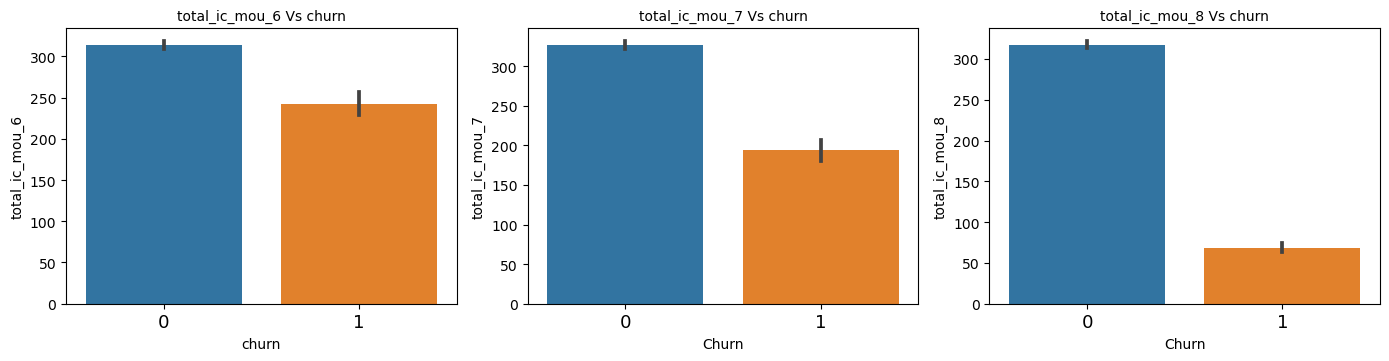

In [39]:
plt.figure(figsize=(14,10))

# total_ic_mou_6
plt.subplot(3, 3, 1)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_ic_mou_6']  , data=tele_high_val_cust)
plt.title('total_ic_mou_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("total_ic_mou_6", fontsize = 10)
plt.xticks(fontsize = 13)



# total_ic_mou_6
plt.subplot(3, 3, 2)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_ic_mou_7']  , data=tele_high_val_cust)
plt.title('total_ic_mou_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_ic_mou_7", fontsize = 10)
plt.xticks(fontsize = 13)


# total_ic_mou_6
plt.subplot(3, 3, 3)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_ic_mou_8']  , data=tele_high_val_cust)
plt.title('total_ic_mou_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_ic_mou_8", fontsize = 10)
plt.xticks(fontsize = 13)

plt.tight_layout()
plt.show()

In [40]:
#observations
"""
Churners (1): Have a lower average total incoming minutes of usage (around 250 minutes) in the 6th month.
Churners (1): Have a further reduced average total incoming minutes of usage (around 200 minutes) in the 7th month.
Churners (1): Display a significantly lower average total incoming minutes of usage (around 100 minutes) in the 8th month.

"""

'\nChurners (1): Have a lower average total incoming minutes of usage (around 250 minutes) in the 6th month.\nChurners (1): Have a further reduced average total incoming minutes of usage (around 200 minutes) in the 7th month.\nChurners (1): Display a significantly lower average total incoming minutes of usage (around 100 minutes) in the 8th month.\n\n'

# Plotting total recharge amout for month ( june , july , august ) against Churn

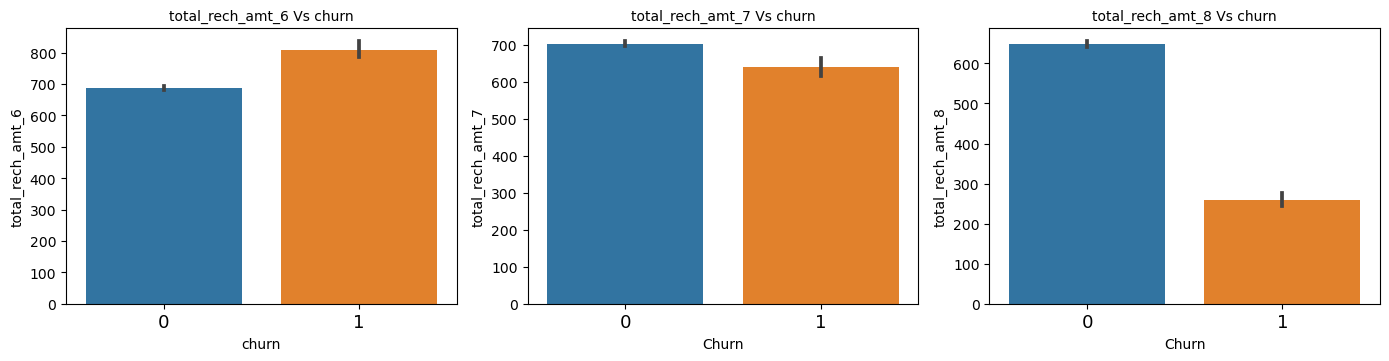

In [41]:
plt.figure(figsize=(14,10))


# total_rech_amt_6
plt.subplot(3, 3, 1)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_rech_amt_6']  , data=tele_high_val_cust)
plt.title('total_rech_amt_6 Vs churn', fontsize = 10)
plt.xlabel("churn", fontsize =10)
plt.ylabel("total_rech_amt_6", fontsize = 10)
plt.xticks(fontsize = 13)



# total_rech_amt_7
plt.subplot(3, 3, 2)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_rech_amt_7']  , data=tele_high_val_cust)
plt.title('total_rech_amt_7 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_rech_amt_7", fontsize = 10)
plt.xticks(fontsize = 13)


# total_rech_amt_8
plt.subplot(3, 3, 3)
sns.barplot(x=tele_high_val_cust['churn'], y =tele_high_val_cust['total_rech_amt_8']  , data=tele_high_val_cust)
plt.title('total_rech_amt_8 Vs churn', fontsize = 10)
plt.xlabel("Churn", fontsize = 10)
plt.ylabel("total_rech_amt_8", fontsize = 10)
plt.xticks(fontsize = 13)

plt.tight_layout()
plt.show()

In [42]:
#observations
"""
Churners (1): Have a higher average total recharge amount in the 6th month.

Insight: This suggests that customers who end up churning have already shown higher recharge activity in the earlier month.

Churners (1): Display a lower average total recharge amount in the 7th month.

Insight: The pattern has flipped, indicating that the non-churners are now spending more on recharges.

Churners (1): Have a much lower average total recharge amount in the 8th month.

Insight: This stark difference highlights that non-churners are consistently engaging more with the service over time, while churners are reducing their engagement.

"""

'\nChurners (1): Have a higher average total recharge amount in the 6th month.\n\nInsight: This suggests that customers who end up churning have already shown higher recharge activity in the earlier month.\n\nChurners (1): Display a lower average total recharge amount in the 7th month.\n\nInsight: The pattern has flipped, indicating that the non-churners are now spending more on recharges.\n\nChurners (1): Have a much lower average total recharge amount in the 8th month.\n\nInsight: This stark difference highlights that non-churners are consistently engaging more with the service over time, while churners are reducing their engagement.\n\n'

# checking top 10 crrelated variables

In [43]:
#changing dtype of churn to go further 
tele_high_val_cust["churn"]=tele_high_val_cust["churn"].astype("int64")

In [44]:
num_varss= ['arpu_6','arpu_7', 'arpu_8', 'total_og_mou_6','total_og_mou_7','total_og_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','churn']

tele_high_val_cust[num_varss].corr()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,churn
arpu_6,1.000000,0.631508,0.570936,0.502760,0.267090,0.209812,0.188394,0.119306,0.104693,0.017062,-0.019516,-0.009775,0.224304,0.126791,0.143057,0.063637
arpu_7,0.631508,1.000000,0.740790,0.275428,0.483082,0.366918,0.090165,0.172819,0.147905,-0.018532,0.023464,0.002251,0.134980,0.236649,0.174212,-0.025596
arpu_8,0.570936,0.740790,1.000000,0.193182,0.344398,0.531550,0.098524,0.155841,0.226590,-0.002707,0.014087,0.054599,0.125663,0.157239,0.253345,-0.182251
total_og_mou_6,0.502760,0.275428,0.193182,1.000000,0.646336,0.487081,0.124534,0.049751,0.022684,-0.100767,-0.111519,-0.097163,-0.101962,-0.110403,-0.092989,0.084412
total_og_mou_7,0.267090,0.483082,0.344398,0.646336,1.000000,0.742486,0.006016,0.099172,0.064699,-0.108238,-0.103355,-0.091393,-0.115488,-0.106185,-0.094844,-0.014122
total_og_mou_8,0.209812,0.366918,0.531550,0.487081,0.742486,1.000000,0.015508,0.080945,0.161321,-0.085144,-0.073805,-0.059645,-0.089582,-0.078207,-0.055675,-0.178752
total_ic_mou_6,0.188394,0.090165,0.098524,0.124534,0.006016,0.015508,1.000000,0.787029,0.699246,0.057308,0.046574,0.055070,0.022063,0.017581,0.032072,-0.055753
total_ic_mou_7,0.119306,0.172819,0.155841,0.049751,0.099172,0.080945,0.787029,1.000000,0.812190,0.051695,0.052913,0.059203,0.018869,0.035605,0.045998,-0.100943
total_ic_mou_8,0.104693,0.147905,0.226590,0.022684,0.064699,0.161321,0.699246,0.812190,1.000000,0.058020,0.064287,0.075086,0.024096,0.041001,0.063015,-0.193286
monthly_2g_6,0.017062,-0.018532,-0.002707,-0.100767,-0.108238,-0.085144,0.057308,0.051695,0.058020,1.000000,0.561061,0.515937,-0.040913,-0.005038,0.016601,-0.053094


# plotting correlations on a heatmap

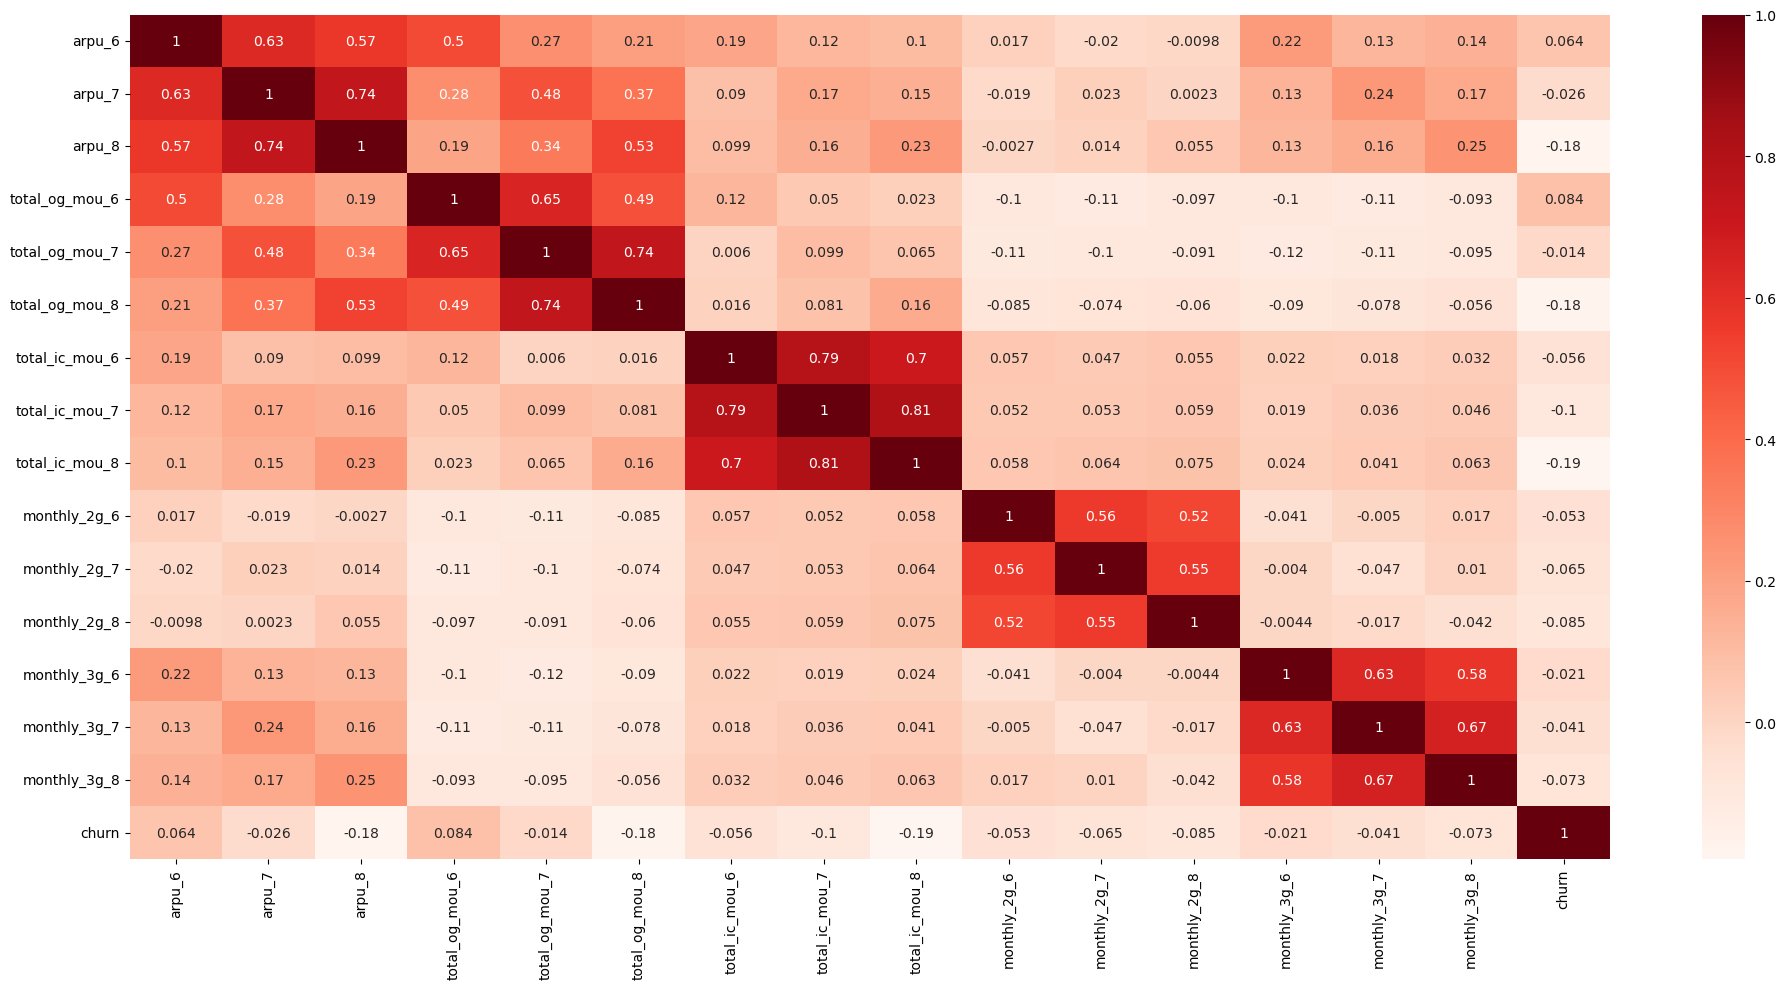

In [45]:
# heatmap of top 10 related variables to target variable

# figure size
plt.figure(figsize=(20,10))

# heatmap
sns.heatmap(tele_high_val_cust[num_varss].corr() ,annot=True, cmap="Reds" )
            
plt.tight_layout()            
plt.show()

# Churn Ratio

In [46]:
#checking churn ratio
(tele_high_val_cust["churn"].value_counts()*100)/len(tele_high_val_cust)

churn
0    91.363955
1     8.636045
Name: count, dtype: float64

# Outlier Capping

In [47]:
 def data_cap(df):
    for col in df.columns:
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.05,0.95]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

tele_high_val_cust=data_cap(tele_high_val_cust)
tele_high_val_cust


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7,churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.0,0.0,0.0,1069.180,1261.8484,1258.7033,57.84,54.680,52.29,453.43,567.160,325.91,16.23,33.490,31.640,23.74,12.59,38.06,51.390,31.380,40.280,308.630,447.380,162.28,33.583,34.095,31.286,0.00,0.00,0.000,422.160,533.910,255.790,4.300,23.29,12.01,49.89,31.76,49.14,6.66,7.93,7.18,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,0.55,4.50,0.00,6.50,0.00,0.0,0.0,487.530,609.24,350.16,58.14,32.26,27.31,217.56,221.490,121.190,72.635,76.091,39.53,427.88,355.230,188.040,36.890,11.83,30.39,91.44,126.99,121.863,12.24,12.31,10.98,0.0,0.0,0.0,180.540,173.08,191.935,626.460,558.040,428.740,0.21,0.0,0.0,2.060,14.530,31.59,3.63,4.831,3.93,5,5,7,1480,790,1494.1,500,500,455,0,0,252,0.00,0.00,0.00,0.00,0.00,0.000,0,0,0,0,0,0,0,0,0,0,0,0,802.0,57.740,19.380,18.740,0.0,1185.0,1
7001524846,0.0,0.0,0.0,378.721,492.2230,137.3620,413.69,351.030,35.08,94.66,80.630,136.48,0.00,0.000,0.000,0.00,0.00,0.00,297.130,217.590,12.490,80.960,70.580,50.54,0.000,0.000,0.000,0.00,0.00,7.150,378.090,288.180,63.040,116.560,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.360,431.66,171.56,23.84,9.84,0.31,57.58,13.980,15.480,0.000,0.000,0.00,81.43,23.830,15.790,0.000,0.58,0.10,22.43,4.08,0.650,0.00,0.00,0.00,0.0,0.0,0.0,22.430,4.66,0.750,103.860,28.490,16.540,0.00,0.0,0.0,0.000,0.000,0.00,0.00,0.000,0.00,19,21,14,437,601,120.0,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.940,0,1,0,0,1,3,0,0,0,0,0,0,315.0,21.030,845.429,122.160,0.0,519.0,0
7002191713,0.0,0.0,0.0,492.846,212.8247,593.2600,501.76,108.390,534.24,413.31,119.280,482.46,23.53,63.422,62.813,7.98,35.26,1.44,49.630,6.190,36.010,151.130,47.280,294.46,4.540,0.000,23.510,0.00,0.00,0.490,205.310,53.480,353.990,446.410,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,0.55,0.00,0.00,4.78,0.00,0.0,0.0,907.090,192.41,1015.26,67.88

# model building

In [48]:
# Putting response variable to y
y = tele_high_val_cust['churn']


# Putting feature variables to X
X = tele_high_val_cust.drop(['churn'],axis=1)

# scaling data

In [49]:
# Importing MinMaxScaler and StandardScaler

from sklearn.preprocessing import StandardScaler

# 1. Instantiate an object

scaler = StandardScaler()

# Crete a list of numeric vars

# 2. Fit on data

Z = scaler.fit_transform(X)

In [50]:
X = pd.DataFrame(data=Z,
                    index =X.index,
                    columns=X.columns)

X.head()


,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_revenue_6_7
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,0.0,0.0,0.0,1.836069,2.509792,2.371628,-0.641636,-0.646623,-0.592363,0.198422,0.514310,-0.056305,0.301952,1.767712,1.661165,0.162096,0.051066,0.955698,-0.211019,-0.432045,-0.288432,0.843580,1.668282,0.060901,3.163309,3.152118,3.170235,-0.411821,-0.422443,-0.416562,0.640729,1.086024,0.075784,-0.559101,-0.498731,-0.491075,-0.449885,-0.521757,-0.395819,2.940086,3.676981,3.741469,0.0,0.0,0.0,-0.639295,-0.620850,-0.528775,-0.276815,0.497328,4.141277,0.025611,-0.616627,0.174067,-0.444161,0.0,0.0,-0.313242,-0.111458,-0.446703,0.050557,-0.357065,-0.396695,0.521085,0.546485,-0.130215,3.154053,3.160961,1.592405,0.968496,0.614313,-0.129515,1.569934,0.096420,1.316760,2.025329,2.957871,3.088267,3.562481,3.524019,3.548710,0.0,0.0,0.0,2.681133,2.446937,3.083427,1.364351,1.072699,0.629439,1.212542,-0.240001,-0.281657,-0.187185,0.730834,2.333648,3.618477,3.606797,3.641589,-0.912721,-0.862380,-0.365277,2.469766,0.357999,2.349452,3.050024,3.001802,2.811052,-1.208854,-1.145796,2.104309,-0.413318,-0.411944,-0.400414,-0.443598,-0.455273,-0.450458,-0.353374,-0.360797,-0.337769,-0.408209,-0.403093,-0.425078,-0.368137,-0.372273,-0.362566,-0.265782,-0.264269,-0.247242,-0.477148,-0.173955,-0.347461,-0.327940,-0.270133,1.823672
7001524846,0.0,0.0,0.0,-0.678425,-0.270001,-1.169580,0.466922,0.238889,-0.648630,-0.870340,-0.908323,-0.645709,-0.377087,-0.353872,-0.358055,-0.387267,-0.366134,-0.361769,2.435957,1.587343,-0.608521,-0.483072,-0.557997,-0.619007,-0.546482,-0.550968,-0.542800,-0.411821,-0.422443,2.474836,0.470663,0.120716,-0.702484,-0.157539,-0.123577,-0.450531,-0.584997,-0.598671,-0.287312,-0.344727,-0.344400,-0.334751,0.0,0.0,0.0,-0.489870,-0.479898,-0.482864,-0.276815,-0.270815,-0.257064,-0.578875,-0.616627,0.618776,-0.444161,0.0,0.0,-0.272616,-0.450476,-0.791686,-0.473693,-0.704678,-0.826743,-0.600653,-0.931203,-0.881882,-0.582243,-0.585422,-0.585643,-0.662574,-0.955059,

# Splitting the data into train set and test set

In [51]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split( X , y , train_size=0.7, stratify=y ,random_state=100)

# class imbalance

In [52]:
# treating class imbalance

# Set random seed
rnd_seed = 12

# Imports
from imblearn.under_sampling import NearMiss


# Create NearMiss instance
nm = NearMiss(version=3)

# Fit and resample imbalanced data
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

# Performing PCA

In [53]:
# importing PCA 
from sklearn.decomposition import PCA , IncrementalPCA

In [54]:
# assigning variance to PCA
pca = PCA(0.95)

In [55]:
# fitting and transforming X_train 
X_train_pca = pca.fit_transform(X_train_nm)

In [56]:
# transforming X_test
X_test_pca = pca.transform(X_test)

# Raandom Forest Model

In [57]:

# Importing RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier


In [58]:
# instantiate RandomForest Classifier

rf = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, oob_score=True)

# fitting model 

rf.fit(X_train_pca, y_train_nm)

RandomForestClassifier(max_depth=3, n_estimators=10, oob_score=True,
                       random_state=42)

In [59]:
rf.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=1608637542)

In [60]:
# Checking Out Of Bag Score for default parameters

print(" Out-Of-Bag Score : ", rf.oob_score_*100)

 Out-Of-Bag Score :  64.87306843267108


In [61]:
# instantiating RF Classifier

rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)

# Running for best hyperparameters (Random Forest)

In [63]:
%%time

from sklearn import model_selection
from sklearn.model_selection import GridSearchCV


# Defining parameters for GridSearchCV

params1 = { 'max_depth' : [1, 2, 5, 10, 20],
           'min_samples_leaf' : [5, 10, 20, 50, 100],
           'max_features' : [2, 3, 4],
           'n_estimators' : [10, 30, 50, 100, 200],
           'min_samples_split' : [2, 4, 5, 7, 9, 10],
           'bootstrap' :  [True]
}


# performing GridSearchCV on RF Classifier

grid_search_rf = model_selection.GridSearchCV(estimator=rf_classifier,
                                              param_grid=params1,
                                              cv=4, n_jobs=-1,
                                              verbose=1,
                                              scoring="accuracy"
                                              )



# Fitting Model

grid_search_rf.fit(X_train_pca, y_train_nm)

Fitting 4 folds for each of 2250 candidates, totalling 9000 fits
CPU times: total: 22.8 s
Wall time: 10min 42s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [1, 2, 5, 10, 20],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 4, 5, 7, 9, 10],
                         'n_estimators': [10, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

# Finding out best hyper-parameters

In [65]:
# Checking best parameters, best score and best estimator of above RandomForest model

print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)
print(grid_search_rf.best_estimator_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 4, 'min_samples_leaf': 20, 'min_samples_split': 2, 'n_estimators': 200}
0.668046357615894
RandomForestClassifier(max_depth=10, max_features=4, min_samples_leaf=20,
                       n_estimators=200, n_jobs=-1, random_state=42)


# Final Model with best parameters (Random Forest)

In [66]:
## Final Model for Random Forest


rf_final = RandomForestClassifier(random_state=42, 
                                  max_depth=20, 
                                  max_features= 4, 
                                  n_estimators=50,
                                  min_samples_leaf= 50,
                                  min_samples_split= 2,
                                  bootstrap= True,
                                  n_jobs=-1,
                                  oob_score=True)


rf_final.fit(X_train_pca, y_train_nm)

RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
                       n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [67]:
# Checking Out Of Bag Score for best parameters

print(" Out-Of-Bag Score : ", rf_final.oob_score_*100)

 Out-Of-Bag Score :  69.48123620309052


# Predicting y_pred for train and test datasets (Random Forest)

In [68]:
# Predicting y_pred for train and test sets for Random Forest

y_train_pred_rf = rf_final.predict(X_train_pca)
y_test_pred_rf = rf_final.predict(X_test_pca)

# Confusion Matrix on train dataset (RandomForest)

In [69]:
# confusion matrix for train df for RandomForest
from sklearn.metrics import accuracy_score, confusion_matrix  # Ensure you import confusion_matrix

print("Accuracy Score for train_df : ", accuracy_score(y_train_nm, y_train_pred_rf))
confusion_matrix_train_rf = confusion_matrix(y_train_nm, y_train_pred_rf)
confusion_matrix_train_rf

Accuracy Score for train_df :  0.7889072847682119


array([[1501,  311],
       [ 454, 1358]], dtype=int64)

In [70]:
# Metrics - Sensitivity, Specificity

TP1rf1 = confusion_matrix_train_rf[1,1] # true positive 
TN1rf1 = confusion_matrix_train_rf[0,0] # true negatives
FP1rf1 = confusion_matrix_train_rf[0,1] # false positives
FN1rf1 = confusion_matrix_train_rf[1,0] # false negatives

# Sensitivity on train dataset (RandomForest)


In [71]:
# sensitivity on train df for RandomForest

sensitivity_initial_train_rf = TP1rf1 / float(TP1rf1+FN1rf1)
print("Initial sensitivity on train_df : " , sensitivity_initial_train_rf)

Initial sensitivity on train_df :  0.7494481236203091


# Specificity on train dataset (RandomForest)

In [72]:
# specificity on train for RandomForest

specificity_initial_train_rf = TN1rf1 / float(TN1rf1+FP1rf1)
print("Initial specificity on train_df : " , specificity_initial_train_rf)

Initial specificity on train_df :  0.8283664459161147


# LogisticRegression

In [73]:
# importing LogiticRegression

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Using RFE for feature_selection

In [74]:
from sklearn.feature_selection import RFE



# Apply Recursive Feature Elimination (RFE)
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [75]:
# Listing out all the features with rfe support and their rfe ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 121),
 ('std_og_t2o_mou', False, 120),
 ('loc_ic_t2o_mou', False, 119),
 ('arpu_6', False, 16),
 ('arpu_7', True, 1),
 ('arpu_8', False, 37),
 ('onnet_mou_6', False, 27),
 ('onnet_mou_7', False, 98),
 ('onnet_mou_8', False, 99),
 ('offnet_mou_6', False, 29),
 ('offnet_mou_7', False, 22),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 95),
 ('roam_ic_mou_7', False, 90),
 ('roam_ic_mou_8', False, 109),
 ('roam_og_mou_6', False, 70),
 ('roam_og_mou_7', False, 89),
 ('roam_og_mou_8', False, 15),
 ('loc_og_t2t_mou_6', False, 59),
 ('loc_og_t2t_mou_7', False, 21),
 ('loc_og_t2t_mou_8', False, 7),
 ('loc_og_t2m_mou_6', False, 32),
 ('loc_og_t2m_mou_7', False, 40),
 ('loc_og_t2m_mou_8', False, 6),
 ('loc_og_t2f_mou_6', False, 46),
 ('loc_og_t2f_mou_7', False, 96),
 ('loc_og_t2f_mou_8', False, 51),
 ('loc_og_t2c_mou_6', False, 53),
 ('loc_og_t2c_mou_7', False, 54),
 ('loc_og_t2c_mou_8', False, 102),
 ('loc_og_mou_6', False, 80),
 ('loc_og_mou_7', False, 12),


In [76]:
# variables shortlisted by RFE

col = X_train.columns[rfe.support_]
col

Index(['arpu_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8',
       'total_og_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'sep_vbc_3g'],
      dtype='object')

# Running 1st iteration of LR Model

In [77]:
# adding constant using statsmodel
import statsmodels.api as sm

X_train_sm_1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
res1 = logm1.fit()
print(res1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20969
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3876.9
Date:                Sat, 21 Dec 2024   Deviance:                       7753.9
Time:                        16:29:27   Pearson chi2:                 1.44e+06
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1963
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2806      0

In [78]:
# Checking VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| std_og_mou_8       | 24.86 |
| loc_ic_mou_8       | 16.41 |
| total_ic_mou_8     | 12.82 |
| std_og_t2t_mou_8   |  9.81 |
| std_og_t2m_mou_8   |  9.2  |
| loc_ic_t2m_mou_8   |  5.92 |
| total_og_mou_8     |  4.93 |
| std_ic_mou_8       |  2.37 |
| total_rech_num_8   |  1.46 |
| arpu_7             |  1.39 |
| last_day_rch_amt_8 |  1.28 |
| vol_3g_mb_8        |  1.21 |
| sep_vbc_3g         |  1.1  |
| vol_2g_mb_8        |  1.05 |
| spl_ic_mou_8       |  1.04 |
+--------------------+-------+


In [79]:
# Dropping loc_ic_mou_8 as it has high VIF value

col_2 = col.drop('loc_ic_mou_8', 1)

# Iteration 2

In [80]:
# adding constant using statsmodel to 2nd iteration

X_train_sm_2 = sm.add_constant(X_train[col_2])
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20970
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3943.4
Date:                Sat, 21 Dec 2024   Deviance:                       7886.8
Time:                        16:29:28   Pearson chi2:                 3.03e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1912
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.3130      0

In [81]:
# Checking VIF values

from statsmodels.stats.outliers_influence import variance_inflation_factor
from tabulate import tabulate

vif = pd.DataFrame()
vif['Features'] = X_train[col_2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_2].values, i) for i in range(X_train[col_2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| std_og_mou_8       | 24.8  |
| std_og_t2t_mou_8   |  9.81 |
| std_og_t2m_mou_8   |  9.2  |
| total_ic_mou_8     |  4.88 |
| total_og_mou_8     |  4.86 |
| loc_ic_t2m_mou_8   |  4    |
| std_ic_mou_8       |  1.67 |
| total_rech_num_8   |  1.46 |
| arpu_7             |  1.39 |
| last_day_rch_amt_8 |  1.28 |
| vol_3g_mb_8        |  1.21 |
| sep_vbc_3g         |  1.1  |
| vol_2g_mb_8        |  1.05 |
| spl_ic_mou_8       |  1.04 |
+--------------------+-------+


In [82]:
# Dropping std_og_mou_8 as it has high VIF value

col_3 = col_2.drop('std_og_mou_8', 1)

# Iteration 3

In [83]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_3 = sm.add_constant(X_train[col_3])
logm3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20971
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3984.0
Date:                Sat, 21 Dec 2024   Deviance:                       7967.9
Time:                        16:29:28   Pearson chi2:                 3.40e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1880
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2664      0

In [84]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_3].values, i) for i in range(X_train[col_3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_ic_mou_8     |  4.85 |
| total_og_mou_8     |  4.17 |
| loc_ic_t2m_mou_8   |  3.98 |
| std_og_t2m_mou_8   |  2.24 |
| std_og_t2t_mou_8   |  2.22 |
| std_ic_mou_8       |  1.66 |
| total_rech_num_8   |  1.46 |
| arpu_7             |  1.39 |
| last_day_rch_amt_8 |  1.28 |
| vol_3g_mb_8        |  1.21 |
| sep_vbc_3g         |  1.1  |
| vol_2g_mb_8        |  1.05 |
| spl_ic_mou_8       |  1.04 |
+--------------------+-------+


In [85]:
# Dropping total_ic_mou_8 as it has high p-value

col_4 = col_3.drop('total_ic_mou_8', 1)

# Iteration 4

In [86]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_4 = sm.add_constant(X_train[col_4])
logm4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20972
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4093.5
Date:                Sat, 21 Dec 2024   Deviance:                       8186.9
Time:                        16:29:29   Pearson chi2:                 1.03e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1795
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0835      0

In [87]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_4].values, i) for i in range(X_train[col_4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_og_mou_8     |  4.06 |
| std_og_t2m_mou_8   |  2.19 |
| std_og_t2t_mou_8   |  2.17 |
| loc_ic_t2m_mou_8   |  1.46 |
| total_rech_num_8   |  1.46 |
| arpu_7             |  1.39 |
| last_day_rch_amt_8 |  1.27 |
| vol_3g_mb_8        |  1.21 |
| std_ic_mou_8       |  1.13 |
| sep_vbc_3g         |  1.1  |
| vol_2g_mb_8        |  1.05 |
| spl_ic_mou_8       |  1.04 |
+--------------------+-------+


In [88]:
# Dropping total_og_mou_8 as it has high p value

col_5 = col_4.drop('total_og_mou_8', 1)

# Iteration 5

In [89]:
# adding constant using statsmodel to 3rd iteration

X_train_sm_5 = sm.add_constant(X_train[col_5])
logm5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  churn   No. Observations:                20985
Model:                            GLM   Df Residuals:                    20973
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4209.0
Date:                Sat, 21 Dec 2024   Deviance:                       8417.9
Time:                        16:29:29   Pearson chi2:                 8.99e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.1704
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.9707      0

In [90]:
# Checking VIF values

vif = pd.DataFrame()
vif['Features'] = X_train[col_5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_5].values, i) for i in range(X_train[col_5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(tabulate(vif, headers='keys', tablefmt='psql', showindex=False))

+--------------------+-------+
| Features           |   VIF |
|--------------------+-------|
| total_rech_num_8   |  1.4  |
| std_og_t2m_mou_8   |  1.32 |
| arpu_7             |  1.28 |
| std_og_t2t_mou_8   |  1.25 |
| last_day_rch_amt_8 |  1.22 |
| vol_3g_mb_8        |  1.2  |
| loc_ic_t2m_mou_8   |  1.19 |
| std_ic_mou_8       |  1.12 |
| sep_vbc_3g         |  1.09 |
| vol_2g_mb_8        |  1.05 |
| spl_ic_mou_8       |  1.04 |
+--------------------+-------+


# Important Features

In [91]:
importances = pd.DataFrame(data={
    'Attribute': X_train[col_5].columns,
    'Importance': res5.conf_int()[1][1:]
})

importances = importances.sort_values(by='Importance', ascending=False)
importances

,Attribute,Importance
arpu_7,arpu_7,0.491179
std_og_t2m_mou_8,std_og_t2m_mou_8,-0.155548
std_og_t2t_mou_8,std_og_t2t_mou_8,-0.254730
std_ic_mou_8,std_ic_mou_8,-0.269240
vol_2g_mb_8,vol_2g_mb_8,-0.362125
spl_ic_mou_8,spl_ic_mou_8,-0.413387
vol_3g_mb_8,vol_3g_mb_8,-0.479874
total_rech_num_8,total_rech_num_8,-0.622759
sep_vbc_3g,sep_vbc_3g,-0.636457
last_day_rch_amt_8,last_day_rch_amt_8,-0.811945


# Visualizing Important Features

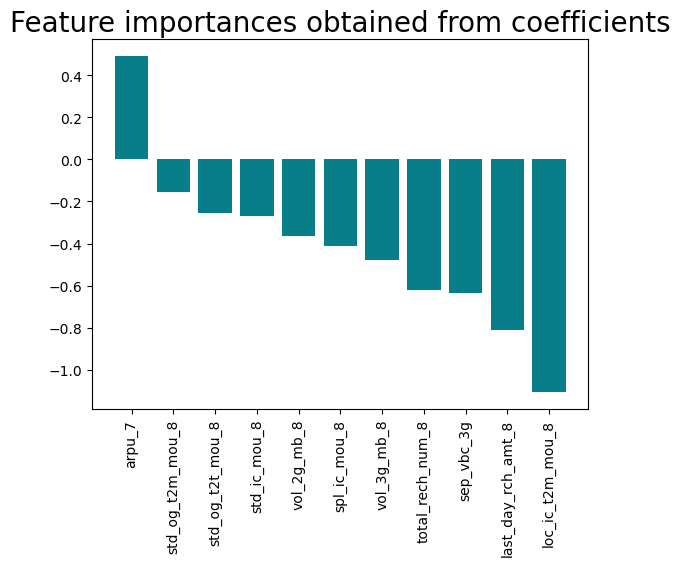

In [92]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
final_result = [['Model', 'Sensitivity', 'Specificity'], 
       ['Random Forest', sensitivity_initial_train_rf, specificity_initial_train_rf]]

print(tabulate(final_result, headers='firstrow', tablefmt='grid'))         

+---------------+---------------+---------------+
| Model         |   Sensitivity |   Specificity |
+===============+===============+===============+
| Random Forest |      0.749448 |      0.828366 |
+---------------+---------------+---------------+


# Conclusion :

# Logistic Regression
For indentifying top features

# Focus

I've evaluated the Model on Sensitivity and Accuracy as we're more focusing on High value churned customers ( Class : 1) as they are more likely to contribute in revenue generation.

# Model Selected : Random Forest

We're going to select random forest on Sensitivity as its have sensitivity (  0.749448 )  while predicting Churned Customers and it's the ability of a model to correctly identify customers that are going to churn.

# Top Features after Logistic Regression

**arpu_7,
std_og_t2m_mou_8,
std_og_t2t_mou_8,
std_ic_mou_8,
vol_2g_mb_8,
spl_ic_mou_8,
vol_3g_mb_8,
total_rech_num_8,
sep_vbc_3g,
last_day_rch_amt_8,
loc_ic_t2m_mou_8
**

# Business recommendation :